In [1]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment1/'
FOLDERNAME = "ml/logistic_regression"
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# This downloads the CIFAR-10 dataset to your Drive
# if it doesn't already exist.
#%cd /content/drive/My\ Drive/$FOLDERNAME/cs231n/datasets/
#!bash get_datasets.sh
#%cd /content/drive/My\ Drive/$FOLDERNAME

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import math

#Dataset

In [3]:
pima = pd.read_csv("diabetes.csv")
print(pima.columns)
columns = ['Glucose','SkinThickness','Outcome']
df = pd.DataFrame(pima, columns=columns)
print(df.head())

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
   Glucose  SkinThickness  Outcome
0      148             35        1
1       85             29        0
2      183              0        1
3       89             23        0
4      137             35        1


In [4]:
# Splitting data set into train and test 

dfx = df.to_numpy()

train_data = dfx[0:500,:]
test_data = dfx[500:,:]

# train data 
train_X = train_data[:,0:2]
train_y = train_data[:,2]

#test data
test_X = test_data[:,0:2]
test_y = test_data[:,2]

In [5]:
def sigmoid(x):
    """A numerically stable version of the logistic sigmoid function."""
    pos_mask = x >= 0
    neg_mask = x < 0
    z = np.zeros_like(x)
    z[pos_mask] = np.exp(-x[pos_mask])
    z[neg_mask] = np.exp(x[neg_mask])
    top = np.ones_like(x)
    top[neg_mask] = z[neg_mask]
    return top / (1 + z)

In [12]:
def print_every(loss,i):
  if i%50 == 0:
    print("Iteration:",i,"loss:",loss)

In [8]:
def normalize(x):
  mu = np.mean(x,axis=0)
  var = np.mean((x-mu)**2,axis=0)
  x = (x - mu) / np.sqrt(var)
  ones = np.ones([x.shape[0],1])
  x = np.append(ones,x,axis=1)
  return x,mu,var

#Train

In [6]:
def logistic_reg_train(x,w,y,iter,lr):

  # linear function same as Linear Regression
  n = x.shape[0]

  loss_hist = []

  for i in range(iter):

    h = np.dot(x,w)
    #Sigmoid Function 
    s = sigmoid(h)
   
    # loss function 
    loss = -(1/n) * ((np.dot(y,np.log(s))) + np.dot((1-y),np.log(1-s)))
    print_every(loss,i)
    
    # Partial derivatives w.r.t w
    
    dw = (1/n) * np.dot((y-s),x)

    #updating parameters 
    w = w + lr*dw

    loss_hist.append(loss) 

  return w,loss_hist

In [9]:
# Normalize the inputs
x_train_norm,mu_train,var_train = normalize(train_X)

# weights initialization 
w = np.random.randn(train_X.shape[1],1) 
w = np.append(0,w)


In [13]:
iter = 2000
lr = 0.003
optim_w, loss_hist = logistic_reg_train(x_train_norm,w,train_y,iter,lr)

Iteration: 0 loss: 0.670044768724279
Iteration: 50 loss: 0.6626523557924836
Iteration: 100 loss: 0.6556799978061332
Iteration: 150 loss: 0.6491072494003616
Iteration: 200 loss: 0.6429141523824431
Iteration: 250 loss: 0.6370812981205708
Iteration: 300 loss: 0.6315898779543568
Iteration: 350 loss: 0.6264217225187003
Iteration: 400 loss: 0.6215593309558392
Iteration: 450 loss: 0.6169858910308043
Iteration: 500 loss: 0.612685291171128
Iteration: 550 loss: 0.6086421254300672
Iteration: 600 loss: 0.6048416923305238
Iteration: 650 loss: 0.6012699884901916
Iteration: 700 loss: 0.5979136978621907
Iteration: 750 loss: 0.594760177353653
Iteration: 800 loss: 0.5917974395106935
Iteration: 850 loss: 0.5890141328844253
Iteration: 900 loss: 0.5863995206210857
Iteration: 950 loss: 0.5839434577512648
Iteration: 1000 loss: 0.5816363675895684
Iteration: 1050 loss: 0.5794692175973817
Iteration: 1100 loss: 0.5774334950079463
Iteration: 1150 loss: 0.5755211824648213
Iteration: 1200 loss: 0.5737247338818299
I

## Predict

In [14]:
def predict(x,y,w):

  h = np.dot(x,w)
  s = sigmoid(h)
  y_pred = []
  for i in range(len(s)):
    if s[i] >= 0.5:
      y_pred.append(1)
    else:
      y_pred.append(0)
  
  return y_pred

In [15]:
x_test_norm,mu,var = normalize(test_X)

pred_y = predict(x_test_norm,test_y,optim_w)
pred_y = np.array(pred_y)

#Calculating the accuracy 
count = 0
for i in range(len(test_y)):
  if test_y[i]==pred_y[i]:
    count+=1

print("Prediction Accuracy:",(count/len(test_y)*100))

Prediction Accuracy: 77.61194029850746


# Plotting the decision boundary 

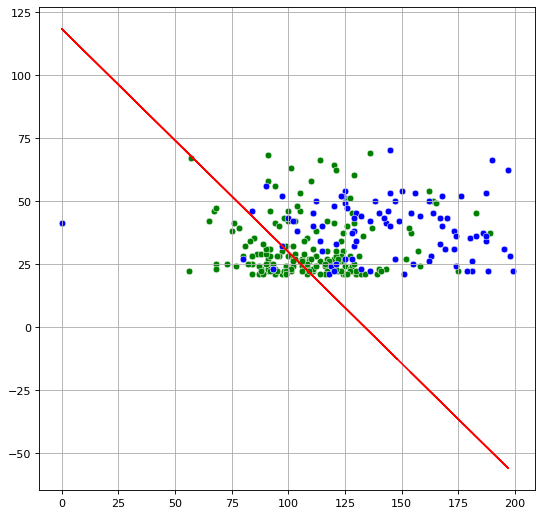

In [91]:
# we will try to plot with different colors 
import matplotlib.pyplot as plt
import seaborn as sbn
plt.figure(figsize=(8, 8), dpi=80)
sbn.scatterplot(x=test_X[:, 0][test_y==0], y=test_X[:, 1][test_y==0],color='green')
sbn.scatterplot(x=test_X[:, 0][test_y==1], y=test_X[:, 1][test_y==1],color='blue')

#plt.margins(x=-0.25, y=-0.25)
decision_boundary =  (-(optim_w[0] + (optim_w[1]) *x_train_norm[:,1])) /(optim_w[2]/10)
plt.plot(train_X[:,0],decision_boundary,color='red')
plt.grid()
plt.show()

Try out different set of data

In [32]:
pima = pd.read_csv("diabetes.csv")
print(pima.columns)
columns = ['Glucose','Age','Outcome']
df = pd.DataFrame(pima, columns=columns)
print(df.head())

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
   Glucose  Age  Outcome
0      148   50        1
1       85   31        0
2      183   32        1
3       89   21        0
4      137   33        1


In [33]:
# Splitting data set into train and test 

dfx = df.to_numpy()

train_data = dfx[0:500,:]
test_data = dfx[500:,:]

# train data 
train_X = train_data[:,0:2]
train_y = train_data[:,2]

#test data
test_X = test_data[:,0:2]
test_y = test_data[:,2]

In [34]:
# Normalize the inputs
x_train_norm,mu_train,var_train = normalize(train_X)

# weights initialization 
w = np.random.randn(train_X.shape[1],1) 
w = np.append(0,w)


In [35]:
iter = 2000
lr = 0.003
optim_w, loss_hist = logistic_reg_train(x_train_norm,w,train_y,iter,lr)

Iteration: 0 loss: 0.6536393076313141
Iteration: 50 loss: 0.6492563106039907
Iteration: 100 loss: 0.6450014258419662
Iteration: 150 loss: 0.6408730876433092
Iteration: 200 loss: 0.6368696791982097
Iteration: 250 loss: 0.632989532059511
Iteration: 300 loss: 0.629230925912058
Iteration: 350 loss: 0.6255920886469993
Iteration: 400 loss: 0.6220711967451137
Iteration: 450 loss: 0.61866637597101
Iteration: 500 loss: 0.6153757023777348
Iteration: 550 loss: 0.6121972036189006
Iteration: 600 loss: 0.6091288605629931
Iteration: 650 loss: 0.6061686092020252
Iteration: 700 loss: 0.603314342844242
Iteration: 750 loss: 0.6005639145781453
Iteration: 800 loss: 0.5979151399927768
Iteration: 850 loss: 0.5953658001369553
Iteration: 900 loss: 0.5929136446980983
Iteration: 950 loss: 0.5905563953793473
Iteration: 1000 loss: 0.5882917494520337
Iteration: 1050 loss: 0.5861173834590634
Iteration: 1100 loss: 0.5840309570436123
Iteration: 1150 loss: 0.582030116876602
Iteration: 1200 loss: 0.580112500655817
Itera

##Predict

In [36]:
x_test_norm,mu,var = normalize(test_X)

pred_y = predict(x_test_norm,test_y,optim_w)
pred_y = np.array(pred_y)

#Calculating the accuracy 
count = 0
for i in range(len(test_y)):
  if test_y[i]==pred_y[i]:
    count+=1

print("Prediction Accuracy:",(count/len(test_y)*100))

Prediction Accuracy: 79.8507462686567


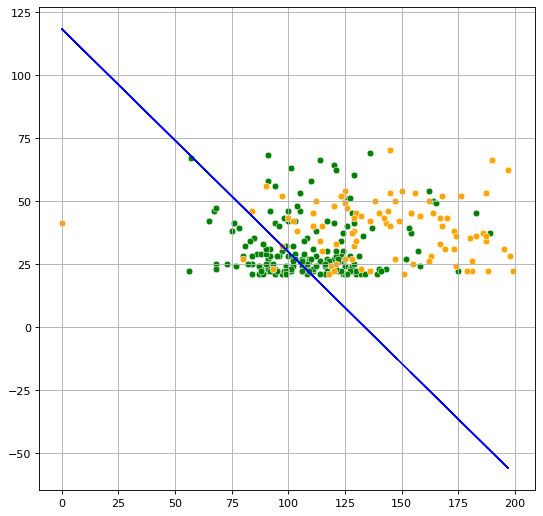

In [93]:
# we will try to plot with different colors 

import matplotlib.pyplot as plt
import seaborn as sbn

plt.figure(figsize=(8, 8), dpi=80)
decision_boundary = (-(optim_w[0] + (optim_w[1]) *x_train_norm[:,1])) /(optim_w[2]/10)
plt.plot(train_X[:,0],decision_boundary,color='blue')
sbn.scatterplot(x=test_X[:, 0][test_y==0],y= test_X[:, 1][test_y==0],color='green')
sbn.scatterplot(x=test_X[:, 0][test_y==1],y= test_X[:, 1][test_y==1],color='orange')

plt.grid()
plt.show()